## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [11]:
?DecisionTreeRegressor

In [37]:
# 讀取資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeRegressor()
clf_adj = DecisionTreeRegressor(criterion = 'mse', min_samples_split = 100, min_samples_leaf = 10)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test) # 用訓練結果去預測

In [28]:
acc = metrics.mean_squared_error(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  27.45566929133858


In [29]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [38]:
import pandas as pd
original = pd.DataFrame(clf.feature_importances_, index = boston.feature_names)
original

0
CRIM     0.069567
ZN       0.001100
INDUS    0.007040
CHAS     0.009560
NOX      0.030775
RM       0.543467
AGE      0.011675
DIS      0.056462
RAD      0.000663
TAX      0.015067
PTRATIO  0.020290
B        0.010107
LSTAT    0.224225

#### 由上述結果和將決策樹視覺化後，發現很複雜，因此調整參數

In [31]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [41]:
clf = DecisionTreeRegressor(criterion = 'mse', min_samples_split = 100, min_samples_leaf = 10)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test) # 用訓練結果去預測
acc = metrics.mean_squared_error(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  30.74078301611068


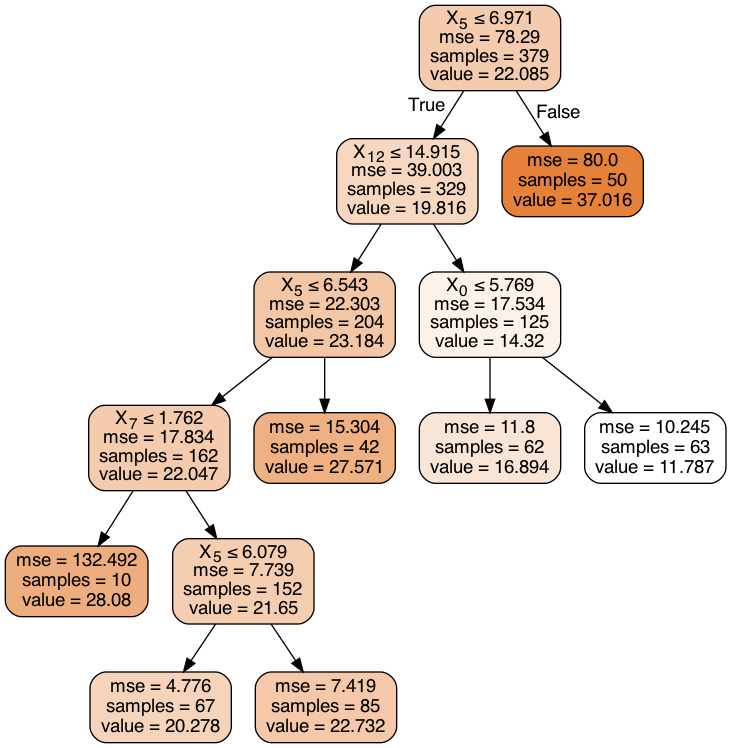

In [35]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [42]:
adj = pd.DataFrame(clf.feature_importances_, index = boston.feature_names)

#### 為了不要使模型過度配適，稍微調整超參數，可以看到以下結果有幾個明顯的特徵控制整個模型，分別是
RM(住宅平均房間数量).LSTAT(區域中被認為是低收入階層的比率)

In [45]:
a = pd.concat([original, adj], axis = 1)
a.columns = ['Default', 'Adjust']
a

Default    Adjust
CRIM     0.069567  0.038114
ZN       0.001100  0.000000
INDUS    0.007040  0.000000
CHAS     0.009560  0.000000
NOX      0.030775  0.000000
RM       0.543467  0.658834
AGE      0.011675  0.000000
DIS      0.056462  0.018147
RAD      0.000663  0.000000
TAX      0.015067  0.000000
PTRATIO  0.020290  0.000000
B        0.010107  0.000000
LSTAT    0.224225  0.284904